#### Score Final = 93,61%

# PREDIÇÃO DAS NOTAS DE MATEMÁTICA DO ENEM 2016

Nesse projeto, o objetivo é criar um modelo de Machine Learning para prever a nota da prova de matemática de quem participou do ENEM 2016. Para isso, utilizei Python, Pandas e Sklearn.

In [123]:
# Importação das libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.feature_selection import RFE

## Início da exploração geral dos dados

In [2]:
# Upload dos datasets
enem = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
enem.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [4]:
enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [5]:
# Comparando a quantidade de features do dataframe "enem" com os dados de teste
print('Qt features treino: {}\nQt features teste: {}'.format(enem.shape[1], test.shape[1]))

Qt features treino: 167
Qt features teste: 47


In [6]:
# Selecionando as features dos dados de teste e armazenando em uma nova variável
features = list(test.columns)
features.append('NU_NOTA_MT')

In [7]:
# Criando um novo dataset para treino, apenas com as features que também estão nos dados de teste
train = enem[features]

## Exploração dos dados de treino

In [8]:
# Visualizando cabeçalho (5 primeiras linhas)
train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,NaN


In [9]:
# Informação geral dos dados
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 48 columns):
NU_INSCRICAO              13730 non-null object
CO_UF_RESIDENCIA          13730 non-null int64
SG_UF_RESIDENCIA          13730 non-null object
NU_IDADE                  13730 non-null int64
TP_SEXO                   13730 non-null object
TP_COR_RACA               13730 non-null int64
TP_NACIONALIDADE          13730 non-null int64
TP_ST_CONCLUSAO           13730 non-null int64
TP_ANO_CONCLUIU           13730 non-null int64
TP_ESCOLA                 13730 non-null int64
TP_ENSINO                 4282 non-null float64
IN_TREINEIRO              13730 non-null int64
TP_DEPENDENCIA_ADM_ESC    4282 non-null float64
IN_BAIXA_VISAO            13730 non-null int64
IN_CEGUEIRA               13730 non-null int64
IN_SURDEZ                 13730 non-null int64
IN_DISLEXIA               13730 non-null int64
IN_DISCALCULIA            13730 non-null int64
IN_SABATISTA              13730 non-null

In [10]:
# Somatório dos dados nulos
train.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATU

In [11]:
# Qt de dados nulos da variável target
train['NU_NOTA_MT'].isna().sum()

3597

In [12]:
# Visualização do dataframe no qual as notas de matemática são nulas
null_grades = train.loc[train.NU_NOTA_MT.isna()]
null_grades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3597 entries, 2 to 13722
Data columns (total 48 columns):
NU_INSCRICAO              3597 non-null object
CO_UF_RESIDENCIA          3597 non-null int64
SG_UF_RESIDENCIA          3597 non-null object
NU_IDADE                  3597 non-null int64
TP_SEXO                   3597 non-null object
TP_COR_RACA               3597 non-null int64
TP_NACIONALIDADE          3597 non-null int64
TP_ST_CONCLUSAO           3597 non-null int64
TP_ANO_CONCLUIU           3597 non-null int64
TP_ESCOLA                 3597 non-null int64
TP_ENSINO                 643 non-null float64
IN_TREINEIRO              3597 non-null int64
TP_DEPENDENCIA_ADM_ESC    643 non-null float64
IN_BAIXA_VISAO            3597 non-null int64
IN_CEGUEIRA               3597 non-null int64
IN_SURDEZ                 3597 non-null int64
IN_DISLEXIA               3597 non-null int64
IN_DISCALCULIA            3597 non-null int64
IN_SABATISTA              3597 non-null int64
IN_GESTANTE  

Abaixo vamos verificar os valores únicos da coluna numérica `TP_PRESENCA_LC`, a qual indica o tipo da presença do candidato na prova de linguagens e códigos. Estamos usando essa variável para não precisar incluir no dataframe de treino a coluna `TP_PRESENCA_MT`, que indica a presença na prova de matemática, pois as mesmas provas ocorrem no mesmo dia (domingo).

As opções de resposta são:
- 0: Faltou
- 1: Presente
- 2: Eliminado

In [13]:
# Qt de valores únicos
null_grades['TP_PRESENCA_LC'].nunique()

2

In [14]:
# Quais são esses valores?
list(np.unique(null_grades[['TP_PRESENCA_LC']].values))

[0, 2]

Como já se esperava, os candidatos que tiveram valor nulo nas suas notas de matemática faltaram na prova ou foram eliminados. 

## Limpeza de dados

#### Vamos separar os dados numéricos dos categóricos, para tratá-los separadamente

In [196]:
categoric_train = list(train.select_dtypes(exclude='number').columns)
numeric_train = list(train.select_dtypes(include='number').columns)
categoric_test = list(test.select_dtypes(exclude='number').columns)
numeric_test = list(test.select_dtypes(include='number').columns)

#### Após separados os tipos de dados, vamos substituí-los por zeros

In [198]:
train[categoric_train] = train[categoric_train].fillna('0')
train[numeric_train] = train[numeric_train].fillna(0)
test[categoric_test] = test[categoric_test].fillna('0')
test[numeric_test] = test[numeric_test].fillna(0)

#### Verificando a alteração

In [17]:
train.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,0,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,0.0,D,D,C,A,A,A,0,A,0.0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,0.0,H,E,E,C,B,C,F,D,0.0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,0.0,E,D,C,A,A,B,F,A,0.0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 48 columns):
NU_INSCRICAO              13730 non-null object
CO_UF_RESIDENCIA          13730 non-null int64
SG_UF_RESIDENCIA          13730 non-null object
NU_IDADE                  13730 non-null int64
TP_SEXO                   13730 non-null object
TP_COR_RACA               13730 non-null int64
TP_NACIONALIDADE          13730 non-null int64
TP_ST_CONCLUSAO           13730 non-null int64
TP_ANO_CONCLUIU           13730 non-null int64
TP_ESCOLA                 13730 non-null int64
TP_ENSINO                 13730 non-null float64
IN_TREINEIRO              13730 non-null int64
TP_DEPENDENCIA_ADM_ESC    13730 non-null float64
IN_BAIXA_VISAO            13730 non-null int64
IN_CEGUEIRA               13730 non-null int64
IN_SURDEZ                 13730 non-null int64
IN_DISLEXIA               13730 non-null int64
IN_DISCALCULIA            13730 non-null int64
IN_SABATISTA              13730 non-nu

#### Vamos plotar agora a variável `NU_INSCRICAO` apenas como índice. Não queremos que o número da inscrição do candidato tenha qualquer influência na previsão da nota que ele vai conseguir, visto que isso não é real.

In [22]:
train = train.set_index('NU_INSCRICAO')

In [24]:
train.head(2)

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,0.0,...,520.0,D,D,C,A,A,C,H,A,399.4
2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,...,580.0,A,A,B,A,A,A,0,A,459.8


#### Verificando a correlação das variáveis com a variável target `NU_NOTA_MT`

In [95]:
corr = train.corr()


A correlação das variáveis com a variável nota de matemática estão em ordem decrescente, ou seja, as variáveis com uma correlação mais forte aparecem de cima para baixo


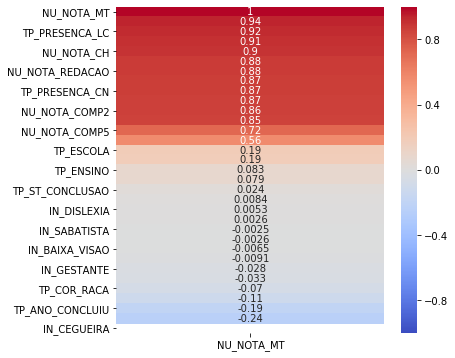

In [107]:
plt.figure(figsize=(6,6))
sns.heatmap(corr[['NU_NOTA_MT']].sort_values(by=['NU_NOTA_MT'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

#### Vamos filtrar apenas as variáveis com uma força de correlação maior que 0.5

In [161]:
corr_columns = corr[(corr['NU_NOTA_MT'] >= 0.5) & (corr['NU_NOTA_MT'] < 1.0)]

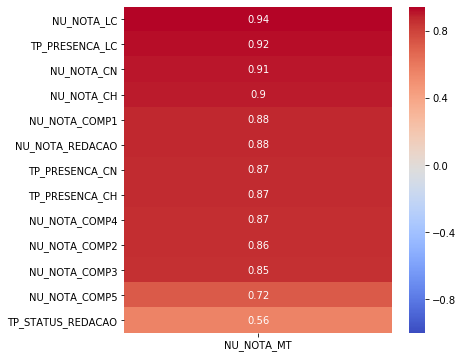

In [162]:
plt.figure(figsize=(6,6))
sns.heatmap(corr_columns[['NU_NOTA_MT']].sort_values(by=['NU_NOTA_MT'],ascending=False), vmin=-1, cmap='coolwarm', annot=True);

In [176]:
# Adicionando as colunas mais correlacionadas a uma lista
features = corr[(corr['NU_NOTA_MT'] >= 0.5) & (corr['NU_NOTA_MT'] < 1.0)]['NU_NOTA_MT']
features = features.index.tolist()
features

['TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

## Treino do modelo

#### Vamos criar agora o `X` e o `Y` para treinar o modelo

In [201]:
#Separando as variáveis explicativas da variável alvo
x_train = train[features]
y_train = train['NU_NOTA_MT']
x_test = test[features]

In [186]:
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', MinMaxScaler()),('LR',LinearRegression())])))
pipelines.append(('KNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('DTR', Pipeline([('Scaler', MinMaxScaler()),('DTR', DecisionTreeRegressor())])))
pipelines.append(('GBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('RFR', Pipeline([('Scaler', MinMaxScaler()),('RFR', RandomForestRegressor())])))

In [187]:
def validaPerformanceModelos(pipelines,x_train,y_train):
    results = []
    names = []
    for name, model in pipelines:
        kfold = KFold(n_splits=5, random_state=21, shuffle=True)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [188]:
validaPerformanceModelos(pipelines, x_train, y_train)

LR: -4723.960519 (162.692530)
KNN: -5112.077303 (100.999282)
DTR: -8443.241889 (460.826889)
GBM: -4077.045839 (69.099119)
RFR: -4379.816584 (87.817116)


In [189]:
# Gradient Boost
pipe_GBM = Pipeline([('scaler', StandardScaler()),
 ('GradientBoostingRegressor', GradientBoostingRegressor())])

In [190]:
CV_pipe_GBM = RandomizedSearchCV(estimator = pipe_GBM, param_distributions = {},cv = 5,return_train_score=
True, verbose=0)

In [203]:
# Gradient Boost
CV_pipe_GBM.fit(x_train, y_train)
ypred = CV_pipe_GBM.predict(x_test)

c:\users\usuario\codenation\venv\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


#### Criando dataset de resposta

In [204]:
df_result = pd.DataFrame()

# Adicionando número de inscrição a ser salvo no arquivo de resposta final
df_result['NU_INSCRICAO'] = test['NU_INSCRICAO']

In [205]:
df_result['NU_NOTA_MT'] = np.around(ypred,2)

In [206]:
df_result.to_csv('answer.csv', index=False, header=True)